# Movies Recommendation System

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv('imdb-movies-dataset.csv')

In [4]:
movies.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [5]:
movies.shape

(10000, 15)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


In [7]:
# Observing NULL values

movies.isna().sum()

Poster               0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [8]:
# Removing NAN data

movies.dropna(inplace=True)
movies.shape

(6404, 15)

In [9]:
movies.duplicated().sum()

0

In [10]:
print(movies.dtypes)

Poster             object
Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes              object
Description        object
Review Count       object
Review Title       object
Review             object
dtype: object


In [11]:
# Converting data types

movies["Year"] = movies["Year"].astype(int)
movies["Review Count"] = movies["Review Count"].str.replace(',', '')
movies["Review Count"] = movies["Review Count"].astype(int)
movies["Votes"] = movies["Votes"].str.replace(',', '')
movies["Votes"] = movies["Votes"].astype(int)
movies.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744,"Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248,"Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401,"In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953,A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517,"Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


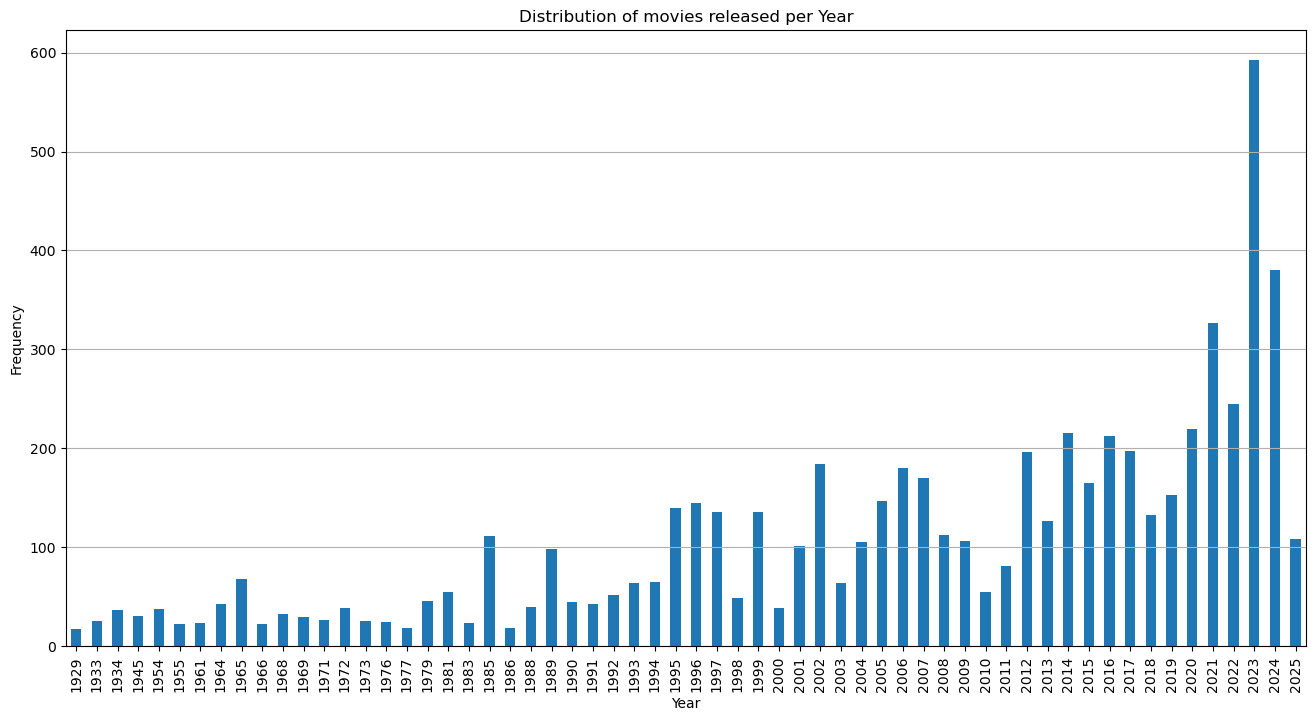

In [12]:
# Distribution of movies released per Year

Freq = movies["Year"].value_counts().sort_index() \
          .plot(kind = "bar", title = "Distribution of movies released per Year", figsize = (16, 8))
 
Freq.set_xlabel("Year")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

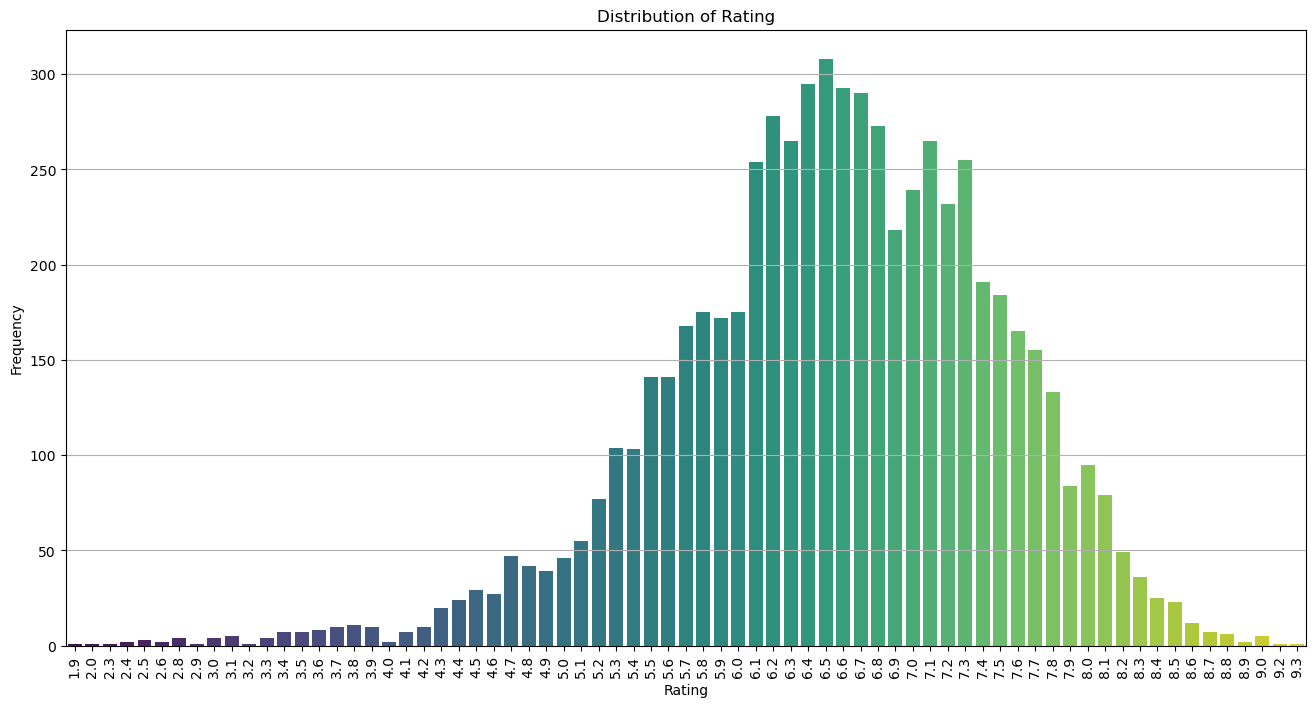

In [13]:
Distribution_Rating = movies['Rating'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Rating")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

# Content Based Recommendation System

In [14]:
movies.head(1)['Description']

0    Solène, a 40-year-old single mom, begins an un...
Name: Description, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies['Description'] = movies['Description'].fillna('')

In [16]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies['Description'])

In [17]:
tfv_matrix

<6404x8040 sparse matrix of type '<class 'numpy.float64'>'
	with 94764 stored elements in Compressed Sparse Row format>

In [18]:
tfv_matrix.shape

(6404, 8040)

In [19]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [20]:
sig[0]

array([0.76164639, 0.76159591, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [21]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies.index, index=movies['Title']).drop_duplicates()

In [22]:
indices

Title
The Idea of You                         0
Kingdom of the Planet of the Apes       1
Unfrosted                               2
The Fall Guy                            3
Challengers                             4
                                     ... 
The Masque of the Red Death          9990
South Central                        9993
Mutiny on the Bounty                 9994
The Greatest Show on Earth           9995
Loving Pablo                         9998
Length: 6404, dtype: int64

In [25]:
indices['The Hangover Part III']

4183

In [26]:
sig[4183]

array([0.76159416, 0.7615946 , 0.76159474, ..., 0.76159416, 0.76159416,
       0.76159416])

In [27]:
list(enumerate(sig[indices['The Hangover Part III']]))

[(0, 0.7615941559557649),
 (1, 0.7615945989911374),
 (2, 0.7615947417179135),
 (3, 0.7615948378654774),
 (4, 0.7615945562083403),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7615945905795881),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615944908610965),
 (15, 0.7615945890280881),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615945676678971),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615987718528909),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615946354943378),
 (32, 0.7615941559557649),
 (33, 0.76159599840913),
 (34, 0.7615941559557649),
 (35, 0.7615946677665498),
 (36, 0.7615941559557649),
 (37, 0.76159

In [30]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies['Title'].iloc[movie_indices]

In [34]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Outbreak')

7342                                                 Reds
9122                                          The Soloist
6013                                        Stars at Noon
2482                                          The Promise
4035                           All the Money in the World
4658                                           Death Wish
3576    Borat Subsequent Moviefilm: Delivery of Prodig...
507                                            Green Book
5592                                           Dreamgirls
5066                                Whiskey Tango Foxtrot
Name: Title, dtype: object